# Section 1 : Dataset
### My dataset and why I chose it.  

I chose the Sample SuperStore dataset as I wanted to undertake a project related to business and data-driven strategy.

I've observed how stores perform well in some locations but not as well in others, which got me thinking about the strategic questions businesses face: why do certain regions underperform, and based on those insights, which new markets should they enter next? I researched what data-driven strategists and consultants actually do and wanted to replicate that process myself.

With a bit of research online, I found the Sample Superstore dataset on Kaggle. It's ideal for my purposes because it has clean data with essential variables covering regions, cities, product categories, and customer segments - everything needed to analyze performance gaps and make market entry decisions.

Through this project, I want to learn how to leverage data science in business decision making: identifying the right variables, recognizing patterns through my own analysis, and making data-driven predictions. 

In [2]:
import pandas as pd
df = pd.read_csv("Sample - Superstore.csv",encoding = "latin1")
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df["City"].nunique()

531

In [4]:
df["State"].nunique()

49

In [5]:
df["Category"].nunique()

3

In [6]:
df["Region"].nunique()

4

In [7]:
df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [8]:
df.size


209874

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.shape

(9994, 21)

In [11]:
print ("Number of rows : " , df.shape[0])
print ("Number of columns : " , df.shape[1])


Number of rows :  9994
Number of columns :  21


### Analysis:
The dataset has 9994 rows and 21 columns. The dataset contains data about 49 unique states, 531 unique cities, 3 product categories, 4 regions and 4 customer segments.

# Section 2 : Exploratory Data Analysis

Now, in order to better understand this dataset and identify patterns, I'll use various descriptive statistics.  
These will be calculted by using various measures of center and spread like mean, median, range and standard deviation, grouping various columns to find best performing product categories and best performing regions, finding correlations between various factors - crucial to understand what actually drives sales and profits , as well as understand the number of cities we have a presence in and which among them are top performers and worst performers. 

In [12]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [13]:
#sale by region
df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

It is evident that South region as well as Central Regions are underperformers while west region is the best performer.

In [14]:

grouped_df=df.groupby("Category").agg("sum",numeric_only = True).reset_index()
grouped_df

,Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728
1,Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008
2,Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481


In [15]:
# Total sales for each category of product.
grouped_df[["Category","Sales"]]

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [16]:
#number of items sold per category
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [17]:
df_groupbedby_region_sales_and_profit = df.groupby("Region")[["Sales","Profit"]].agg("sum",numeric_only = True).reset_index()
df_groupbedby_region_sales_and_profit

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


In [18]:
#Total sales by region
df_groupbedby_region = df.groupby("Region")["Sales"].agg("sum",numeric_only = True).reset_index()
df_groupbedby_region

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


In [19]:
#Mean of sales by region
df.groupby("Region")["Sales"].agg("mean",numeric_only = True).reset_index()

,Region,Sales
0,Central,215.772661
1,East,238.336110
2,South,241.803645
3,West,226.493233


In [20]:
#Standard deviation of sales by region
df.groupby("Region")["Sales"].agg("std").reset_index()

,Region,Sales
0,Central,632.779010
1,East,620.712652
2,South,774.796273
3,West,524.876877


In [21]:
#sale by region
df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

The West region has the maximum aggregate sales(725k) with the least standard deviation as well which shows stability while the aggregate sales of the Southern region are the least(391k) - about half of those of West region - with the highest standard deviation of 774K - indicating instability.  
Another pattern we can observe is that the southern region has the highest average value per sale while the Western region has the second lowest, which probably shows that western region have comparatively cheaper prices which probably drives more customer purchases. This is evident because in our dataset, we can observe how the western region made 3203 sales as compared to merely 1620 sales in the southern region, indicating that Western region might have a larger user base, market size and different product mix favoring lower-priced items.  
The central region was the second lowest for number of sales, net sales and had the lowest average value per sale.


In [22]:
#Total profit by region
df.groupby("Region")["Profit"].agg("sum",numeric_only = True).reset_index()


,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


In [23]:
#Mean profit by region
df.groupby("Region")["Profit"].agg("mean",numeric_only = True).reset_index()


,Region,Profit
0,Central,17.092709
1,East,32.135808
2,South,28.857673
3,West,33.849032


In [24]:
#Standard Deviation of profit by region
df.groupby("Region")["Profit"].agg("std").reset_index()


,Region,Profit
0,Central,291.487465
1,East,251.605084
2,South,212.893088
3,West,174.109081


The profit metrics are once again led by the West region with maximum net profit of 108k, the highest average profit per sale as well as the least standard deviation, once again proving stability. On the other hand, the Central region is the loser when it comes to profits, with the least net profit, least average profit per sale and highest standard deviation. However, the Southern region is clearly the second worst afer Central region for all these metrics.

In [25]:
df.groupby("Region")["Discount"].agg("sum",numeric_only = True).reset_index()

,Region,Discount
0,Central,558.34
1,East,414.00
2,South,238.55
3,West,350.20


In [26]:
df.groupby("Region")["Discount"].agg("mean",numeric_only = True).reset_index()

,Region,Discount
0,Central,0.240353
1,East,0.145365
2,South,0.147253
3,West,0.109335


In [27]:
df.groupby("Region")["Discount"].agg("std").reset_index()

,Region,Discount
0,Central,0.265433
1,East,0.193155
2,South,0.197420
3,West,0.146861


This discount analysis has revealed a key pattern for my analysis. The Central and Souuthern region have the highest and second highest average discount per sale as well as standard deviation. Yet these 2 are the regions that have the lowest total sales and profits indicating that over discounting might be impacting their over all revenue and profit. In contrast, the Western region has the least average discount and still leads profits and net revenue proving that profitability isn't necessaily driven by huge discounts.

In [28]:
df.groupby(["Region","Category"])["Quantity"].agg("count").reset_index()

,Region,Category,Quantity
0,Central,Furniture,481
1,Central,Office Supplies,1422
2,Central,Technology,420
3,East,Furniture,601
4,East,Office Supplies,1712
5,East,Technology,535
6,South,Furniture,332
7,South,Office Supplies,995
8,South,Technology,293
9,West,Furniture,707


West has the most items sold across all categories while South has the least by some margin with Central being the second lowest. Additionally office supplies have the highest volume of sales in all regions while technology has the least. However over all, the product mix is fairly constant across all regions, showing that regional differences aren't seemingly caused by category preference.

In [29]:
df.groupby("Category")["Sales"].agg("mean",numeric_only = True).reset_index()

,Category,Sales
0,Furniture,349.834887
1,Office Supplies,119.324101
2,Technology,452.709276


In [30]:
df.groupby("Category")["Profit"].agg("mean",numeric_only = True).reset_index()

,Category,Profit
0,Furniture,8.699327
1,Office Supplies,20.327050
2,Technology,78.752002


It's evident that Technology products are the most expensive and profitable by a margin. Secondly, office supplies although relatively the cheapest among the 3 still generates more than double the profit as compared to furniture which is the least profitable.

In [31]:
df.groupby(["Region","Category"])["Sales"].agg("mean").reset_index()

,Region,Category,Sales
0,Central,Furniture,340.534644
1,Central,Office Supplies,117.458801
2,Central,Technology,405.753124
3,East,Furniture,346.574383
4,East,Office Supplies,120.044425
5,East,Technology,495.278469
6,South,Furniture,353.309289
7,South,Office Supplies,126.282727
8,South,Technology,507.753952
9,West,Furniture,357.302325


In [32]:
df.groupby(["Region","Category"])["Profit"].agg("mean").reset_index()

,Region,Category,Profit
0,Central,Furniture,-5.968918
1,Central,Office Supplies,6.244712
2,Central,Technology,80.231981
3,East,Furniture,5.068496
4,East,Office Supplies,23.957114
5,East,Technology,88.714084
6,South,Furniture,20.395199
7,South,Office Supplies,20.086827
8,South,Technology,68.231506
9,West,Furniture,16.272914


In [33]:
df.groupby(["Region","Category"])["Sales"].agg("sum",numeric_only = True).reset_index()

,Region,Category,Sales
0,Central,Furniture,163797.1638
1,Central,Office Supplies,167026.4150
2,Central,Technology,170416.3120
3,East,Furniture,208291.2040
4,East,Office Supplies,205516.0550
5,East,Technology,264973.9810
6,South,Furniture,117298.6840
7,South,Office Supplies,125651.3130
8,South,Technology,148771.9080
9,West,Furniture,252612.7435


In [34]:
df.groupby(["Region","Category"])["Profit"].agg("sum",numeric_only = True).reset_index()

,Region,Category,Profit
0,Central,Furniture,-2871.0494
1,Central,Office Supplies,8879.9799
2,Central,Technology,33697.4320
3,East,Furniture,3046.1658
4,East,Office Supplies,41014.5791
5,East,Technology,47462.0351
6,South,Furniture,6771.2061
7,South,Office Supplies,19986.3928
8,South,Technology,19991.8314
9,West,Furniture,11504.9503


Looking at performance by category reveals a critical issue: Furniture is losing money in the Central region (negative $2,871 profit), likely due to excessive discounting and other inefficiencies. Technology is the most profitable category across all regions, while Furniture struggles with low margins everywhere. 

The West region leads in total sales across all categories. South shows particularly weak performance with lower sales across all categories (120k in furniture vs West's 250k), and Central has terrible profit margins for both Furniture and Office Supplies. Although Southern region has fairly decent profit margins, its total profit is low as expected since it had the least number of sales.

### Correlation between variables.


In [35]:
#Correlations between variables:
df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


#### Meaningful Takeaways from this correlation matrix:  
Sales and Profit(0.48) - This is a moderately positive correlation(profit increases with sales) but not as high as we normally would have expected showing that Profit isn't merely driven by sales volume.  

Profit and Discount(-0.219) - This tells us that as discount increases, profit decreases even though the correlation is weak negative. This explains our previous finding where discounting in Central and Southern regions was greatly impacting profitability. 

Sales and Discount(-0.02) - This value indicates that there is almost no correlation between sales and discounts, transpiring that in the scenario we are analysing, discounts do not improve sales. This is a huge finding because not only are disocunts reducing profitability of the super store, but are also not improving the sales of the superstore. This is critical proof that the excessive discounting strategy in Central and Southern Region is futile, degrading profit margins as well as not even making a positive impact in sales.  

Profit and Quantity(0.06) - This is an interesting findind which reveals that there is barely any correalation between profit and quanitity, which means that if customers are buying more amount of stuff, it isn't impacting over all sales.

Quantity and Discount(0.008) - Even this is surprising as contrary to normal belief, increasing the discount doesn't cause people to get more quanitity of stuff, as there is barely any correlation between the 2.


#### City and State Analysis

In [36]:

#number of unique cities
num_unique_cities = df["City"].nunique()
print("Number of unique cities : ",num_unique_cities)
print("\n")
#cities with maximum items sold
print("Cities with maximum items sold :\n", df["City"].value_counts().nlargest(10))
print("\n")
#cities with minimum items sold
print("Cities with minimum items sold :\n", df["City"].value_counts().nsmallest(10))


Number of unique cities :  531


Cities with maximum items sold :
 New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64


Cities with minimum items sold :
 Kissimmee         1
Iowa City         1
Danbury           1
Rogers            1
Linden            1
Citrus Heights    1
Littleton         1
Tinley Park       1
Davis             1
Portage           1
Name: City, dtype: int64


In [37]:

num_unique_states = df["State"].nunique()
print("Number of unique states : ", num_unique_states)
print("\n")

print("State with maximum items sold :\n", df["State"].value_counts().nlargest(10))
print("\n")

print("State with minimum items sold :\n", df["State"].value_counts().nsmallest(10))


Number of unique states :  49


State with maximum items sold :
 California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64


State with minimum items sold :
 Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: State, dtype: int64


The dataset contians 531 unique cities and 49 unique states. States like California, New York and Texas have the maximum items sold while Wyoming, West Virginia, North Dakota and Maine have the least number of items sold.  

In [38]:
df_groupbedby_city=df.groupby("City")[["Sales","Profit"]].agg("sum",numeric_only = True).reset_index()

In [39]:
#df_groupbedby_city.nsmallest(25,"Sales")
#df_groupbedby_city.nlargest(10,"Profit")
#df_groupbedby_city.nsmallest(25,"Profit")
#df_groupbedby_state.nlargest(10,"Sales")
#df_groupbedby_state.nsmallest(25,"Sales")
#df_groupbedby_state.nlargest(10,"Profit")
#df_groupbedby_state.nsmallest(25,"Profit")

In [40]:
df_groupbedby_state=df.groupby("State")[["Sales","Profit"]].agg("sum",numeric_only = True).reset_index()

In [41]:
df_groupbedby_city.nlargest(10,"Sales")

,City,Sales,Profit
329,New York City,256368.1610,62036.9837
266,Los Angeles,175851.3410,30440.7579
452,Seattle,119540.7420,29156.0967
438,San Francisco,112669.0920,17507.3854
374,Philadelphia,109077.0130,-13837.7674
207,Houston,64504.7604,-10153.5485
80,Chicago,48539.5410,-6654.5688
437,San Diego,47521.0290,6377.1960
216,Jacksonville,44713.1830,-2323.8350
464,Springfield,43054.3420,6200.6974


In [42]:
df_groupbedby_state.nlargest(10,"Sales")

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563
45,Washington,138641.2700,33402.6517
36,Pennsylvania,116511.9140,-15559.9603
8,Florida,89473.7080,-3399.3017
11,Illinois,80166.1010,-12607.8870
33,Ohio,78258.1360,-16971.3766
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504


In [89]:
df_groupbedby_city.nlargest(10,"Profit")

,City,Sales,Profit
329,New York City,256368.161,62036.9837
266,Los Angeles,175851.341,30440.7579
452,Seattle,119540.742,29156.0967
438,San Francisco,112669.092,17507.3854
123,Detroit,42446.944,13181.7908
233,Lafayette,25036.200,10018.3876
215,Jackson,24963.858,7581.6828
21,Atlanta,17197.840,6993.6629
300,Minneapolis,16870.540,6824.5846
437,San Diego,47521.029,6377.1960


In [43]:
df_groupbedby_city.nsmallest(10,"Profit")

,City,Sales,Profit
374,Philadelphia,109077.0130,-13837.7674
207,Houston,64504.7604,-10153.5485
434,San Antonio,21843.5280,-7299.0502
241,Lancaster,9891.4640,-7239.0684
80,Chicago,48539.5410,-6654.5688
60,Burlington,21668.0820,-3622.8772
109,Dallas,20131.9322,-2846.5257
375,Phoenix,11000.2570,-2790.8832
24,Aurora,11656.4780,-2691.7386
216,Jacksonville,44713.1830,-2323.8350


In [91]:
df_groupbedby_state.nlargest(10,"Profit")

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
45,Washington,138641.2700,33402.6517
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504
12,Indiana,53555.3600,18382.9363
9,Georgia,49095.8400,16250.0433
15,Kentucky,36591.7500,11199.6966
21,Minnesota,29863.1500,10823.1874
6,Delaware,27451.0690,9977.3748


In [44]:
df_groupbedby_state.nsmallest(10,"Profit")

,State,Sales,Profit
41,Texas,170188.0458,-25729.3563
33,Ohio,78258.1360,-16971.3766
36,Pennsylvania,116511.9140,-15559.9603
11,Illinois,80166.1010,-12607.8870
31,North Carolina,55603.1640,-7490.9122
4,Colorado,32108.1180,-6527.8579
40,Tennessee,30661.8730,-5341.6936
1,Arizona,35282.0010,-3427.9246
8,Florida,89473.7080,-3399.3017
35,Oregon,17431.1500,-1190.4705


In [45]:
df_cities_with_negative_profits = df_groupbedby_city[df_groupbedby_city["Profit" ]< 0].sort_values("Profit")
df_cities_with_negative_profits

,City,Sales,Profit
374,Philadelphia,109077.0130,-13837.7674
207,Houston,64504.7604,-10153.5485
434,San Antonio,21843.5280,-7299.0502
241,Lancaster,9891.4640,-7239.0684
80,Chicago,48539.5410,-6654.5688
...,...,...,...
354,Ormond Beach,2.8080,-1.9656
370,Pensacola,2.2140,-1.4760
140,Elyria,1.8240,-1.3984
7,Altoona,20.4510,-1.1835


In [46]:
df_states_with_negative_profits = df_groupbedby_state[df_groupbedby_state["Profit" ]< 0].sort_values("Profit")
df_states_with_negative_profits

,State,Sales,Profit
41,Texas,170188.0458,-25729.3563
33,Ohio,78258.1360,-16971.3766
36,Pennsylvania,116511.9140,-15559.9603
11,Illinois,80166.1010,-12607.8870
31,North Carolina,55603.1640,-7490.9122
4,Colorado,32108.1180,-6527.8579
40,Tennessee,30661.8730,-5341.6936
1,Arizona,35282.0010,-3427.9246
8,Florida,89473.7080,-3399.3017
35,Oregon,17431.1500,-1190.4705



New York, LA, Seattle, and San Francisco are leaders in sales and constitute a major portion of total revenue. Shockingly though, cities like Philadelphia, Houston, Chicago, and Jacksonville - which are otherwise in the top 10 cities for sales - have negative profits. 

Among the states, California, New York, Texas, and Washington lead in sales. However, notably, Texas, Ohio, Pennsylvania, and Illinois all make the top 10 for sales yet have negative profit values.

On deeper analysis, we find that there are a total of 116 cities and 10 states with negative profit values, with Philadelphia, Houston, San Antonio, Lancaster, and Chicago being the worst among cities, and Texas, Ohio, Pennsylvania, Illinois, and North Carolina being the worst among states. 

The number of cities and states with negative profits is very alarming. Many markets that rank in the top 10 for sales still lose money, indicating that despite high demand in those areas, excessive discounting or other strategic inefficiencies are destroying profitability.

One thing we certainly understand from this is that merely high levels of sales can't promise profitability, there are other fcators that must be looked at to ensure that.

### Overall EDA Takeaways

Through this exploratory analysis, several critical patterns have emerged that will guide my strategic recommendations in Part 2:

The Discount Problem : The most shocking finding is that discounts barely have any correlation with sales (r = -0.02) yet negatively impact profits (r = -0.22). Central and South's aggressive discounting strategy is destroying margins without even driving sales growth, making it completely unproductive.

Category-Specific Insights: Technology, despite being the least sold category, is by far the most profitable. Office Supplies dominate in sales volume and already maintain strong profit margins - which suggests there might be room to increase margins further given the high demand. Meanwhile, Furniture is struggling everywhere, most critically in Central where it's actively losing 2,871 dollars, revealing product-specific problems that go beyond just regional issues.

Profitability Crisis: The existence of 116 cities and 10 states having negative profits is very alarming. Major markets like Philadelphia, Houston, and Chicago appear in the top 10 for sales yet are loss making. Texas alone loses 25,729 dollars despite generating 170K in sales. This clearly proves that high sales volume doesn't guarantee profitability - these markets have the demand, but something about the execution is fundamentally broken.

Accessing both Successes and Failures : West region's dominance (725k sales, 108k profits, lower discounts) is in complete contrast to Central and South's struggles. Understanding what West is doing right - minimal discounting, consistent performance, strong margins - is probably just as important as diagnosing what's going wrong elsewhere.

Strategic Insight : The core problem isn't lack of demand as underperforming regions and cities clearly have customers and sales. The real issue is execution: poor pricing and discount strategies, category mix problems, and operational inefficiencies are harming profits. 
This leads me to a dual strategy for Part 2: 
(1) Fix what's broken in existing markets by optimizing discounts, addressing category losses, and figuring out why high-sales regions are losing money.
(2) Identify smart expansion opportunities by using West's success patterns and characteristics of profitable cities to find new markets without repeating these same mistakes.

#  Section 3 : Exploratory Data Visualisation

<Axes: title={'center': 'Quantity of items sold of each category'}, xlabel='Category', ylabel='Quanitity'>

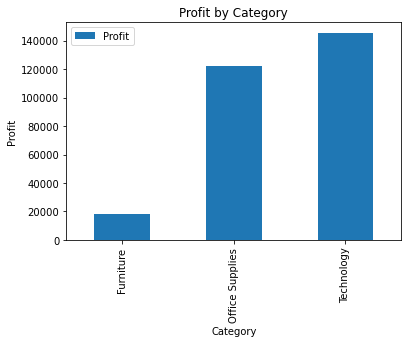

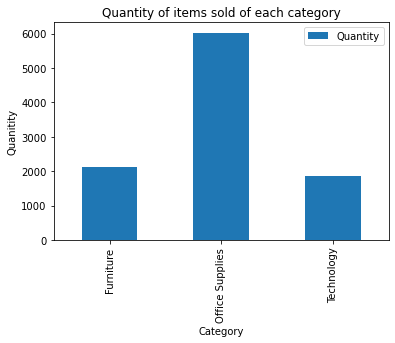

In [48]:
grouped_df.plot.bar(x = "Category",y = "Profit",title = "Profit by Category",xlabel = "Category",ylabel = "Profit")
grouped_df1=df.groupby("Category")["Quantity"].agg("count").reset_index()
grouped_df1.plot.bar(x = "Category",y = "Quantity",title = "Quantity of items sold of each category",xlabel = "Category",ylabel = "Quanitity")

### Analysis :
Visual representation of our prevcious analysis that technology items have maximum profit margins but least quanitity of sales. Office supplies have triple the sales of technology items, but still trail the over all profit of technology appliances by 20000 dollars. Lastly, furniture has extremely less over all profit and also lacks in quantity of sales.  
A few inferences we can conclude are that :  

1 - Increasing the quantity of Technology sales will bring in a lot of profit.  

2 - The demand of office supplies can be leveraged to the super store's advantage and they need to find a way to increase the profit they earn from office supplies.  

3 - Quantity as well as profit margins of furniture sales need to be improved. Excessive discounting in central and southern regions are further deteriorating the profit margins.

<Axes: title={'center': 'States that make the least profit(or are loss making).'}, xlabel='State', ylabel='Profit'>

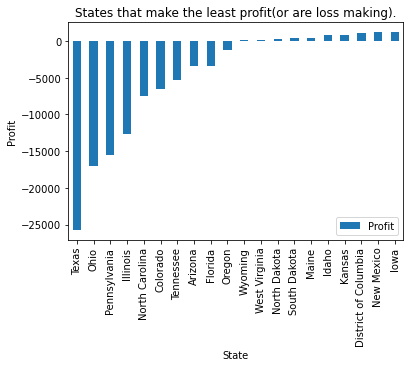

In [49]:
df_groupbedby_state_worst_profit = df_groupbedby_state.nsmallest(20,"Profit")
df_groupbedby_state_worst_profit.plot.bar(x = "State", y = "Profit",xlabel = "State",ylabel = "Profit",title = "States that make the least profit(or are loss making).")

<Axes: title={'center': 'City that make the least profit(or are loss making).'}, xlabel='City', ylabel='Profit'>

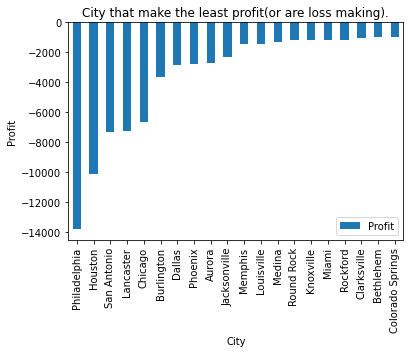

In [50]:
df_groupbedby_city_worst_profit = df_groupbedby_city.nsmallest(20,"Profit")
df_groupbedby_city_worst_profit.plot.bar(x = "City",y = "Profit",xlabel = "City",ylabel = "Profit",title = "City that make the least profit(or are loss making).")

### Analysis:
The two bar graphs highlight the concerning trend we found : several cities and states — including many that are actually among the top performers in sales — are consistently losing money. This signals serious underperformance in key locations that should be driving profit. If issues like excessive discounting and operational inefficiencies continue unchecked, the financial situation of the Superstore will only deteriorate further.

<Axes: title={'center': 'Average Discount per sale provided by each region.'}, xlabel='Region', ylabel='Average Discount per sale'>

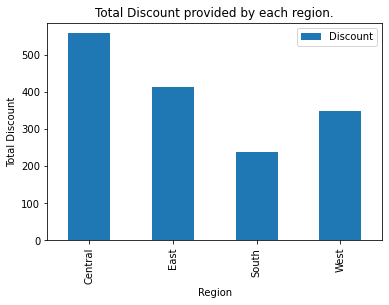

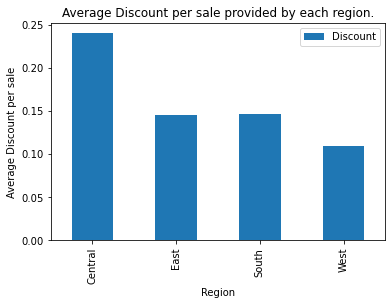

In [51]:
df.groupby("Region")["Discount"].agg("sum",numeric_only = True).reset_index().plot.bar(x = "Region", y ="Discount",xlabel = "Region", ylabel = "Total Discount",title = "Total Discount provided by each region.")
df.groupby("Region")["Discount"].agg("mean",numeric_only = True).reset_index().plot.bar(x = "Region", y ="Discount",xlabel = "Region", ylabel = "Average Discount per sale",title = "Average Discount per sale provided by each region.")

### Analysis:

These graphs are visual representations of the excessive discounting happening in the poor-performing Central and East regions compared to the best-performing Western region. The Central region has both the highest total discount and the highest mean discount. The average discount per sale in the Southern region is also concerning.

One new observation we can make from these visualizations is how the Eastern region has the second-highest total discounts and average discounts per sale. Despite all this, it’s still profitable and performing decently well. It’s interesting to see how the Eastern region is functioning well even after we’ve already seen that discounting has no correlation with sales and a negative correlation with profit. In fact, maybe if the Eastern region reduces its discounts, it could perform even better, or tell us how to use discounts to our advantage.

<Axes: title={'center': 'Sales and Profit per region'}, xlabel='Region', ylabel='Sales and Profit'>

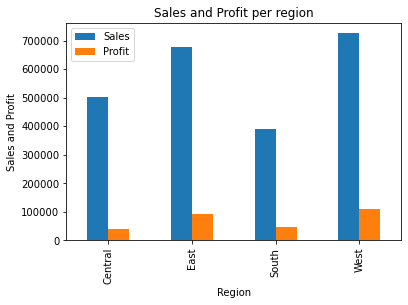

In [52]:
df_groupbedby_region_sales_and_profit = df.groupby("Region")[["Sales","Profit"]].agg("sum",numeric_only = True).reset_index()
df_groupbedby_region_sales_and_profit.plot.bar(x = "Region",ylabel = "Sales and Profit",title = "Sales and Profit per region")

### Analysis:
This comparison powerfully illustrates the performance gap across regions. West leads in both sales (more than 700k) and profit (100+K), showing strong execution. Central and South, however, show a troubling pattern: while Central generates 500K in sales, its profit is only about 40K - a drastically lower profit margin than West. South's gap is even worse relative to its sales . This visualization confirms that the problem isn't revenue generation - it's profitability. Both struggling regions need operational fixes, not just more sales volume.

In [53]:
#unused code
#df.plot.scatter(x = "Profit", y = "Sales", title = "Correlation Profit vs Sales")
#grouped_df.plot.bar(x = "Category",y = "Sales")
#groupedbyregionandcategory = df.groupby("Region")["Profit"].agg("sum",numeric_only = True).reset_index()
#groupedbyregionandcategory = df.groupby("Region")["Profit"].agg("sum",numeric_only = True).reset_index()
#df.groupby("Region")["Profit"].agg("sum",numeric_only = True).reset_index().plot.bar(x="Region")

# Section 4 - Data Science

Our EDA and EDV have been extremely enlightening and honestly extremely fun. I have thoroughly enjoyed unraveling this data bit by bit, to uncover hidden patterns and factors that explain the data so well. Every time I've found a key factor that wasn't obvious to the naked eye, it's been thrilling. Contrary to general belief, in this scenario, discount can be seen as the most harmful factor. The Southern and Central regions expected discounts to drive more sales, but they ended up putting excessive discounts and hurting their own profitability. And then, during EDV we found something completely new - how the Eastern region, despite its extensive discounting, is still profitable. It was indeed shocking to see cities and states who were otherwise in the top 10 for sales having negative profits. A shocking 116 cities and 10 states being loss-making - some of them being some of the most prominent places in America like Philadelphia, Houston, and Texas. Uncovering how Furniture as a category is struggling in both sales capacity and profitability, while Office Supplies - despite having triple the quantity of sales of Technology items - still trail in profit by 20,000 dollars. And that critical finding about Central region's Furniture category actively losing 2871 dollars.

It has genuinely been so interesting uncovering all this information about this dataset.

However, it's going to get even more exciting as I will build on all this exploration. Having understood to quite an extent what exactly is making regions underperform and what factors drive performance, in Part 2 I'll provide solutions. Because right now, it's evident that demand is not the problem for the underperforming locations - over-discounting, poor product mix, and operational inefficiencies are, which must be sorted to improve the performance of loss-making regions. Only after that will we focus on the expansion of the superstores, what new markets to target, and how to go about that process.  

I haven't completely finalised what I'll include in part 2, but over all I think I at least plan to:  

1 - Use k-means clustering to group cities based on their characteristics and figure out what traits the successful and unseuccesful cities have in common. This will help identify where expansion actually makes sense.

2 - Build a linear regression model to predict expected sales and profit based on factors like discounts, product mix, and customer segments. Then I’ll compare the model’s expected performance with the actual numbers to see which regions are truly underperforming and by how much.

3 - Give practical recommendations for the Central and South regions — things like more reasonable discount levels, which product categories they should focus on, and which unprofitable cities might be worth fixing versus eventually exiting.


# Section 5: Data Science

The question that I want to explore is: 

Can I use factors like sales volume, discount rates, and quantity to accurately predict profit? Then based on this, I want to look at cities that are underperforming despite accounting for these factors.  
To answer this, I'll make use of a Linear Legression Model that I will train on features like Discounts, Sales, and Quantity to predict Profit. Using this, I'll compute the residual (actual profit - predicted profit) to figure out which cities and regions are underperforming expectations. The model will help me separate cities that are struggling because of bad fundamentals (high discounts, poor product mix) from cities that are struggling for other operational reasons even when those factors are accounted for.

In [54]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
training = df.sample(frac = 0.7,random_state=10)
test = df[~df.index.isin(training.index)]
ind = ["Discount", "Sales","Quantity"]
dep = "Profit"
model.fit(training[ind],training[dep])
print("Model has been trained successfully!")



Model has been trained successfully!


In [73]:
test["Predicted Profit"] = model.predict(test[ind])
test

/var/folders/s6/5lk6pvr97g93xr1gkc39n4rh0000gn/T/ipykernel_7410/226487225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted Profit"] = model.predict(test[ind])


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Predicted Profit
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,34.703593
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,64.250611
10,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,234.946342
11,12,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568,119.633030
18,19,CA-2014-143336,8/27/2014,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.5600,2,0.00,2.4824,33.783822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.5000,10,0.00,15.1200,28.764269
9986,9987,CA-2016-125794,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1,0.00,15.2208,39.047687
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470,60.577940
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,22.670761


In [74]:
test["Residual"] = test["Profit"] - test["Predicted Profit"]
test

/var/folders/s6/5lk6pvr97g93xr1gkc39n4rh0000gn/T/ipykernel_7410/1485123389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Residual"] = test["Profit"] - test["Predicted Profit"]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Predicted Profit,Residual
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,34.703593,-27.832193
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,64.250611,-447.281611
10,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,234.946342,-149.637142
11,12,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568,119.633030,-51.276230
18,19,CA-2014-143336,8/27/2014,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.5600,2,0.00,2.4824,33.783822,-31.301422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.5000,10,0.00,15.1200,28.764269,-13.644269
9986,9987,CA-2016-125794,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1,0.00,15.2208,39.047687,-23.826887
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470,60.577940,-4.930940
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,22.670761,-3.277561


In [75]:
test.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Predicted Profit', 'Residual'],
      dtype='object')

In [76]:
test_useful = test[["City","State","Region","Category","Product Name","Sales","Quantity","Discount",'Profit',"Predicted Profit","Residual"]]
test_useful.head(10)

,City,State,Region,Category,Product Name,Sales,Quantity,Discount,Profit,Predicted Profit,Residual
2,Los Angeles,California,West,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,34.703593,-27.832193
3,Fort Lauderdale,Florida,South,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,64.250611,-447.281611
10,Los Angeles,California,West,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,234.946342,-149.637142
11,Los Angeles,California,West,Technology,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568,119.633030,-51.276230
18,San Francisco,California,West,Office Supplies,Newell 341,8.5600,2,0.00,2.4824,33.783822,-31.301422
20,San Francisco,California,West,Office Supplies,"Wilson Jones Hanging View Binder, White, 1""",22.7200,4,0.20,7.3840,-15.252192,22.636192
23,Philadelphia,Pennsylvania,East,Furniture,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,-30.272509,29.252909
26,Los Angeles,California,West,Technology,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.5700,3,0.00,11.7741,45.168424,-33.394324
30,Philadelphia,Pennsylvania,East,Office Supplies,Poly String Tie Envelopes,3.2640,2,0.20,1.1016,-16.079842,17.181442
31,Philadelphia,Pennsylvania,East,Office Supplies,"BOSTON Model 1800 Electric Pencil Sharpeners, ...",86.3040,6,0.20,9.7092,-7.726907,17.436107


In [77]:
test.groupby("Region").agg("mean",numeric_only = True).reset_index()

,Region,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Predicted Profit,Residual
0,Central,4828.481698,64881.698389,202.804149,3.667643,0.239414,16.572866,2.765394,13.807472
1,East,5001.292486,17452.294798,227.985905,3.736416,0.148671,33.595718,28.773727,4.821991
2,South,5063.427992,34295.576065,256.662357,3.975659,0.143813,31.927803,34.063381,-2.135578
3,West,5001.774295,91684.840125,266.123296,3.910136,0.110240,46.389461,43.804412,2.585048


### Analysis : 
This linear regression model has given us the prediction about what it thinks the estimated profit should be based off the factors sales discount and quantity. Thus the residual that has been found reveals what regions are performing better or worse than the prediction made by the model.

Central has the lowest actual profit at 16.57 per order and while the model predicted only 2.77 a positive residual of 13.81 that does not mean Central is doing well it is still the worst region by far. All this really shows is that based on the factors of the Central region considered by the model high average discount and less sales volume the model expected them to be making almost nothing. The fact that they are making 16.57 suggests there are some operational factors the model has not accounted for maybe better product mix or other costs that are keeping results from being even worse. But the real issue is unchanged their heavy discounting is killing profitability.

South is the only region with a negative residual 2.13 which means that not only does it have poor average profit due to over discounting based on the factors considered by the model it should have been doing slightly better than what it is doing right now. That means that there are some other operational inefficiencies like returns or additional costs such as shipping that are making the situation doubly worse.

West remains the top performer with 46.39 profit per order and a small positive residual 2.59. East also performs above expectations with 33.60 profit and a 4.82 residual. Both regions are clearly running efficiently.

Bottom line Southern region has serious issues even beyond discounting revealed by the residuals. Central regions discounting has ruined overall profits but it also has some kind of operational strength worth exploring. West and East are doing well as they have the right discounts and good operational efficiency.

In [82]:
test.groupby("State").agg("mean",numeric_only = True).reset_index().nsmallest(10,"Residual")

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Predicted Profit,Residual
48,Wyoming,5870.000000,82001.000000,1603.136000,4.000000,0.200000,100.196000,224.619309,-124.423309
46,West Virginia,8691.500000,26003.000000,339.792000,2.500000,0.150000,-36.948000,46.731147,-83.679147
31,North Carolina,5280.714286,28071.511905,286.760357,4.000000,0.283333,-67.805779,4.381574,-72.187353
14,Kansas,5785.625000,67013.000000,127.028750,2.500000,0.000000,16.323400,51.233373,-34.909973
17,Maine,6946.500000,4320.500000,55.110000,2.000000,0.000000,15.705700,40.849062,-25.143362
7,District of Columbia,2149.000000,20016.000000,23.816000,4.200000,0.000000,10.322440,33.761473,-23.439033
13,Iowa,5257.625000,51146.625000,37.411250,3.500000,0.000000,15.503213,36.568792,-21.065579
23,Missouri,4558.666667,64852.571429,414.635238,3.761905,0.000000,75.375210,93.544567,-18.169358
5,Connecticut,6448.333333,6542.000000,147.236500,3.055556,0.016667,31.460439,49.621762,-18.161324
19,Massachusetts,5758.347826,1983.891304,290.688522,4.021739,0.032609,50.059750,66.457246,-16.397496


In [92]:

df_groupbedby_state.nsmallest(10,"Profit")

,State,Sales,Profit
41,Texas,170188.0458,-25729.3563
33,Ohio,78258.1360,-16971.3766
36,Pennsylvania,116511.9140,-15559.9603
11,Illinois,80166.1010,-12607.8870
31,North Carolina,55603.1640,-7490.9122
4,Colorado,32108.1180,-6527.8579
40,Tennessee,30661.8730,-5341.6936
1,Arizona,35282.0010,-3427.9246
8,Florida,89473.7080,-3399.3017
35,Oregon,17431.1500,-1190.4705


## Analysis:  
Analysing the state level reveals two types of problem markets. Texas has a loss of 25729 Ohio has a loss of 16971 and Pennsylvania has a loss of 15559. These are the worst absolute losses but they are expected based on their poor fundamentals. The model predicted they would struggle given their high discounts and weak sales. The fix is to reduce discounts.

Wyoming with a residual of negative 124 West Virginia with a residual of negative 84 and Kansas with a residual of negative 35 tell a different story. They are underperforming what the model predicted. These states have efficiency issues beyond discounting such as remote locations high shipping costs or markets that are too small for profitability. The fix here is to consider exiting these markets.

North Carolina appears in both lists making it the highest priority. It has both bad fundamentals and additional unexplained operational issues.

In [ ]:
#test.groupby("City").agg("mean",numeric_only = True).reset_index().nsmallest(10,"Residual")
#df_groupbedby_city.nsmallest(10,"Profit")

In [96]:
test.groupby("Category").agg("mean",numeric_only = True).reset_index().nsmallest(10,"Residual")

,Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Predicted Profit,Residual
0,Furniture,5054.623622,54560.015748,372.942414,3.828346,0.175780,10.028868,44.027345,-33.998477
1,Office Supplies,4949.172281,54527.146328,124.374178,3.806184,0.157040,24.306646,10.920561,13.386085
2,Technology,4953.445652,55554.844203,461.734616,3.831522,0.131341,90.809815,68.401465,22.408350


## Analysis
Furniture performs poorly across every region and the residual of negative 34 confirms it. Even after making a profit prediction based on sales discounts and quantity Furniture still delivers 34 less profit per order than the model expects. This means the problem is not pricing; it is structural. Bulky shipping higher damage rates or thin margins are likely making Furniture consistently unprofitable.

Meanwhile Technology with a residual of positive 22 and Office Supplies with a residual of positive 13 outperform expectations. Technology was already the most profitable category and this shows it is also the most efficient. Office Supplies despite having lower prices still generates more profit than predicted.

From a strategy perspective it makes sense to expand sales in Technology and Office Supplies since they already have a very efficient structure. Furniture especially the Central region segment that lost 2871 needs major restructuring or possibly even removal because discount adjustments alone will not fix it.



In [86]:
test.groupby("State").agg("mean",numeric_only = True).reset_index().nlargest(10,"Residual")

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Predicted Profit,Residual
6,Delaware,4524.909091,19745.272727,587.115000,4.181818,0.000000,264.844618,119.276877,145.567741
21,Minnesota,3470.142857,55479.428571,592.574286,3.190476,0.000000,264.068448,121.158939,142.909509
26,Nevada,4736.111111,89136.777778,1280.758000,5.888889,0.088889,267.063478,200.937815,66.125663
9,Georgia,4672.274194,30929.661290,327.260968,4.177419,0.000000,129.073994,79.841570,49.232423
0,Alabama,3948.470588,36037.470588,367.760588,3.529412,0.000000,122.612565,86.677115,35.935450
45,Washington,5277.125786,98156.823899,367.937774,4.119497,0.056604,104.570797,72.192081,32.378716
43,Vermont,5812.000000,5408.000000,373.985000,5.000000,0.000000,109.841550,86.059096,23.782454
18,Maryland,5355.968750,21046.031250,313.915062,3.562500,0.009375,99.764597,76.169736,23.594860
11,Illinois,4979.012903,60659.477419,176.621361,3.638710,0.377419,-13.565273,-35.030341,21.465068
25,Nebraska,4831.750000,68084.250000,307.641667,3.333333,0.000000,99.028058,77.760785,21.267274


In [87]:
test.groupby("City").agg("mean",numeric_only = True).reset_index().nlargest(10,"Residual")

,City,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Predicted Profit,Residual
228,Minneapolis,3747.666667,55407.000000,1696.246667,3.500000,0.000000,794.106800,288.342591,505.764209
233,Mobile,2812.666667,36608.000000,1037.300000,4.333333,0.000000,497.396267,187.443796,309.952471
158,Independence,1856.000000,64055.000000,1208.685000,3.000000,0.000000,487.831500,214.873061,272.958439
258,North Las Vegas,4684.000000,89031.000000,1916.359000,5.250000,0.050000,508.999750,307.626051,201.373699
16,Atlanta,4808.187500,30318.000000,746.993125,4.437500,0.000000,336.814725,143.271066,193.543659
1,Abilene,6990.000000,79605.000000,1.392000,2.000000,0.800000,-3.758400,-163.543520,159.785120
280,Pearland,3212.000000,77581.000000,11.228000,7.000000,0.800000,-18.526200,-167.363967,148.837767
203,Lubbock,2005.000000,79424.000000,11.364000,3.000000,0.800000,-17.046000,-163.092662,146.046662
253,Newark,4973.090909,27138.636364,566.363909,3.409091,0.063636,239.315795,101.338528,137.977268
147,Hickory,8924.000000,28601.000000,4.572000,4.000000,0.700000,-3.810000,-140.656275,136.846275


### Analysis :  
Some markets are performing far better than expected. States like Delaware with a residual of positive 145.57 Minnesota with a residual of positive 142.91 and Nevada with a residual of positive 66.13 generate far more profit than their fundamentals predict. At the city level Minneapolis stands out with a residual of positive 505.76 earning 794 per order when the model expected only 288. Cities like Mobile with a residual of positive 309.95 Independence with a residual of positive 272.96 and North Las Vegas with a residual of positive 201.37 also outperform significantly.

A clear pattern appears. Many of these winners are mid sized markets not major metro areas. Lower costs less competition or a strong regional product mix likely give them an advantage. Minneapolis is especially important because both the city and the state of Minnesota show strong performance suggesting highly effective operational execution.

Strategically this means expansion should not focus only on large cities like New York or Los Angeles. The company should look for markets that resemble these high residual areas. Understanding why Minneapolis is so much more profitable than predicted whether due to lower competition customer loyalty or favorable market conditions could guide strong expansion decisions. These cities demonstrate that excellent operations can push profitability far beyond what sales and discounts alone would suggest.

# Section 6 : A Different Data Visualisation:


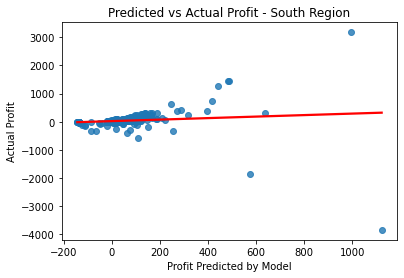

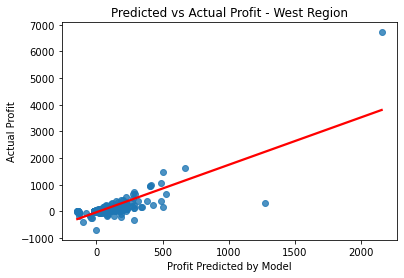

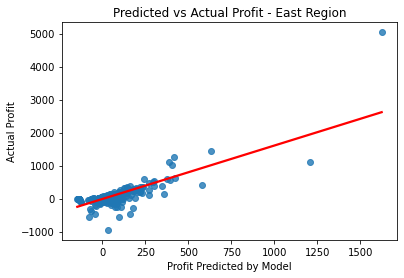

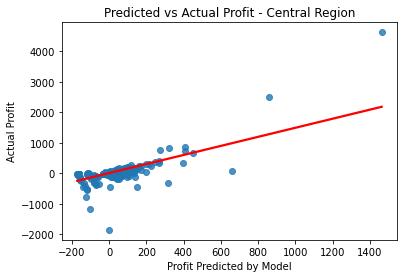

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


south_test = test[test['Region'] == 'South']

sns.regplot(data=south_test, x="Predicted Profit", y="Profit", 
            ci=None, line_kws={'color':'red'})
plt.title("Predicted vs Actual Profit - South Region")
plt.xlabel("Profit Predicted by Model")
plt.ylabel("Actual Profit")
plt.show()

west_test = test[test['Region'] == 'West']


sns.regplot(data=west_test, x="Predicted Profit", y="Profit", 
            ci=None, line_kws={'color':'red'})
plt.title("Predicted vs Actual Profit - West Region")
plt.xlabel("Profit Predicted by Model")
plt.ylabel("Actual Profit")
plt.show()

east_test = test[test['Region'] == 'East']

sns.regplot(data=east_test, x="Predicted Profit", y="Profit", 
            ci=None, line_kws={'color':'red'})
plt.title("Predicted vs Actual Profit - East Region")
plt.xlabel("Profit Predicted by Model")
plt.ylabel("Actual Profit")
plt.show()

central_test = test[test['Region'] == 'Central']

sns.regplot(data=central_test, x="Predicted Profit", y="Profit", 
            ci=None, line_kws={'color':'red'})
plt.title("Predicted vs Actual Profit - Central Region")
plt.xlabel("Profit Predicted by Model")
plt.ylabel("Actual Profit")
plt.show()



## Analysis : 
Making region specific scatter plots with best lines of fit, strengthen our region based findings from section 5. 
West region shows an upward trend line, with the data points strongly clustered aroud it, meaning that the model was able to predict the profit quite reliably for this region. What we can infer from this consistency is that not only does the west region has strong parameters(factors on which the model was trained i.e. sales, discount and quanitiy) but also has great operational efficiency which makes it outperform. It has over all cracked the code of right pricing as well as avoiding operational mishaps and returns etc.  

In stark contrast, South's line of best fit and huge scatter (outliers ranging from -$4000 to $3000) tells a sad story. The trend line being flat shows that the model's prediction is useless for the south region as the actual profit numbers are quite different from the predicted profit numbers. This means that the profit in this region is actually not fully dependent on the parameters we considered i.e. sales, discount and quantity and its being ruined by other operational inefficiences as well in addition to the over discounting. 
East and Central regions' profit numbers are decently consistent with the trend line and show a bit more scatter than West, showing slight operational inefficiencies but nothing as messed up as South. 

In [123]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

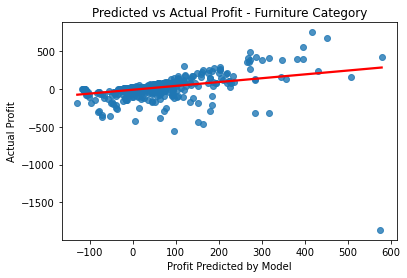

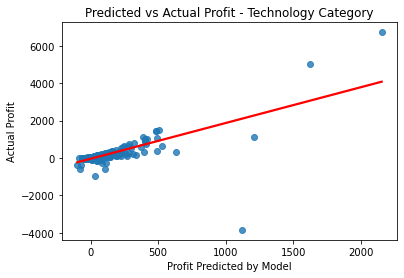

In [129]:
furniture_test = test[test['Category'] == 'Furniture']

# Scatter plot for South
sns.regplot(data=furniture_test, x="Predicted Profit", y="Profit", 
            ci=None, line_kws={'color':'red'})
plt.title("Predicted vs Actual Profit - Furniture Category")
plt.xlabel("Profit Predicted by Model")
plt.ylabel("Actual Profit")
plt.show()
tech_test = test[test['Category'] == 'Technology']

# Scatter plot for South
sns.regplot(data=tech_test, x="Predicted Profit", y="Profit", 
            ci=None, line_kws={'color':'red'})
plt.title("Predicted vs Actual Profit - Technology Category")
plt.xlabel("Profit Predicted by Model")
plt.ylabel("Actual Profit")
plt.show()

## Analysis 
The Furniture plot makes it really clear why this category struggles everywhere. The trend line is almost flat and most of the points sit below zero profit, which shows the model keeps overpredicting Furniture profit. Even when the inputs look decent, the actual profit just doesn’t show up. Most Furniture orders hover around break even or straight losses, and the huge scatter means the results are all over the place. This lines up with the –$34 residual from Section 5 and basically confirms that Furniture has deeper structural problems. Things like high shipping costs, higher damage rates, or thin margins are probably making this category unprofitable no matter how much you sell or how much you discount.

Technology looks completely different. The plot has a clear upward slope and the points stay pretty close to the line, especially at lower profit levels. The model actually works well here because Technology profit is consistent and predictable, which matches the +$22 residual. The contrast is huge: Technology reliably delivers what the model expects, while Furniture almost always falls short. This just reinforces the point that Furniture needs major changes or maybe even removal, and that Technology and Office Supplies should be the categories pushing growth going forward.

/Users/shauryaghai/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Correlation Discount vs Profit'}, xlabel='Discount', ylabel='Profit'>

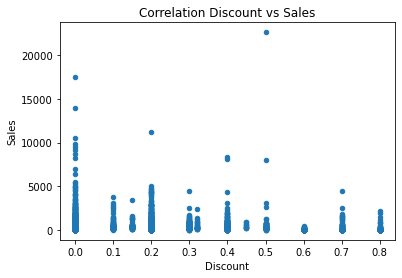

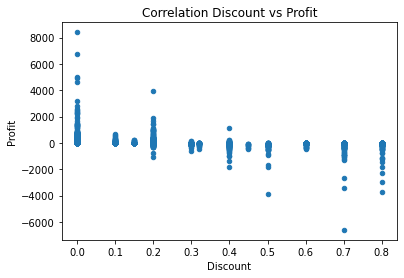

In [118]:
df.plot.scatter(x = "Discount", y = "Sales",title = "Correlation Discount vs Sales",xlabel = "Discount",ylabel = "Sales")
df.plot.scatter(x = "Discount", y = "Profit",title = "Correlation Discount vs Profit",xlabel = "Discount",ylabel = "Profit")

### Analysis : 

The scatter plots make it evident that there is almost no correlation between Discount and Sales.  
In addition, there's a neagtive correlation between discounts and profit.  
Both of these confirm visually how discounts do not improve sales and rather end up hurting profitability.

<Axes: title={'center': 'Average Residual by Category'}, xlabel='Category', ylabel='Average Residual'>

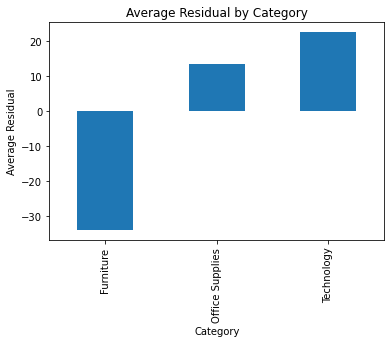

In [116]:
test.groupby("Category")["Residual"].mean().plot.bar(
    title="Average Residual by Category",
    ylabel="Average Residual",
    xlabel="Category"
)

## Analysis : 
This bar graph is just reiterates our finding of how furnitute has a shockingly negative residual while both office supplies and technology are exceeding the expectations of the model. This just helps us visualise our previous discovery better. 

# Section 7: Overall Summary 

This project analysed the Sample Superstore dataset to understand why certain regions underperform compared to others, identify new regions for market entry, and examine the factors that drive profit and sales. Our key discovery is that discount does not have any correlation with sales with an r value near zero at negative 0.02. However over discounting destroys profit margins as shown by a correlation of negative 0.22 between discount and profit. This discount trap is the reason why the Central region despite generating 501 thousand in sales makes only 39 thousand in profit because it has an average discount of 24 percent which ruins its margins. The Southern region also suffers from the same issue. The most successful West region achieves 108 thousand in profit from 725 thousand in sales with only 11 percent average discounts. This provides visual evidence that higher discounts do not increase sales and instead reduce profit.

Most concerning is that 116 cities and 10 states were losing money including major markets like Texas with a loss of 25729 and Philadelphia with a loss of 13837. Even more surprising is that some of these money losing markets also appeared in the top ten lists in other categories.

Part two of the linear regression model revealed that the South region and the Furniture category have operational problems beyond pricing alone. The South region has a residual of negative 2.14 which means it underperforms even after accounting for sales and discounts. In addition the scatter plot shows a nearly flat trend line indicating that the model cannot reliably predict the South regions profit at all. Furniture has a residual of negative 34 across all regions which signals structural issues such as shipping costs damage rates or thin margins that make this category unprofitable regardless of any pricing strategy. In contrast high performing markets like Minneapolis with a residual of positive 506 and Delaware with a residual of positive 145 show that strong operations can push profitability far beyond what the fundamentals suggest.

The state of Minnesota with a residual of positive 142.91 and its capital Minneapolis with a residual of positive 505.76 were among the highest performers. This indicates that the market conditions and operational practices in such locations should be studied to understand what drives their strong profitability. These conditions should be replicated elsewhere and new markets with similar characteristics should be considered for expansion.

Based on the analysis the following strategic suggestions can be made.

1 Immediate action on discounts. The Central and Southern regions must reduce discounts and should not exceed the West regions 11 percent because current discount levels are destroying profitability.

2 The South region needs major operational changes. Beyond discounting it has significant inefficiencies such as high return rates shipping expenses or product mix issues which have caused its negative residual. These issues must be identified and resolved quickly.

3 Decisions for the Furniture category. The Central region’s Furniture segment lost 2871 and should be eliminated immediately. The company should evaluate whether to restructure or exit the Furniture category entirely given its negative 34 residual.

4 Expansion strategy. Focus on mid sized markets that resemble Minneapolis Mobile and Independence rather than only concentrating on high sales cities. These cities consistently generate residuals between positive 300 and positive 500.

5 Technology with a residual of positive 22 and Office Supplies with a residual of positive 13 outperform expectations. The company should shift its product mix toward these categories.

6 Exit unprofitable markets. The 116 unprofitable cities require corrective actions. If operational issues cannot be fixed quickly these markets should be exited. Some markets such as Wyoming may be unviable regardless of improvements because Wyoming had one of the worst residuals at negative 124 which means that even though the model expected decent profit due to balanced parameters operational inefficiencies eliminated profitability. If these inefficiencies are beyond the companys control it makes more sense to exit and redirect efforts toward markets with better operational conditions.